In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df  = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df=df[df['Churn']=='Yes']

In [10]:
train  = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)

In [11]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
import copy

data = train.to_dict(orient='records')
new_data = []

for row in data:
    tmp_row = copy.deepcopy(row)
    tmp_row["current_tenure"] = tmp_row["tenure"]
    new_data.append(tmp_row)
    for ten in range(1, row["tenure"]):
        tmp_row = copy.deepcopy(row)
        tmp_row["current_tenure"] = ten
        new_data.append(tmp_row)

df_all_tenures = pd.DataFrame.from_dict(new_data)

In [13]:
df_all_tenures.to_csv('df_churn_all_tenures.csv', index=False)

In [14]:
train = pd.read_csv("./df_churn_all_tenures.csv", low_memory=False)

In [15]:
train = train[train["Churn"] == "Yes"]

In [16]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,current_tenure
35,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
36,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
82,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2
83,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
84,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227720,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,66
227931,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,4
227932,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1
227933,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,2


In [17]:
train=train.drop(['TotalCharges','Churn'], axis=1)

In [18]:
t=train.copy()

In [19]:
dicc=train.dtypes.to_dict()

In [20]:
dicc

{'customerID': dtype('O'),
 'gender': dtype('O'),
 'SeniorCitizen': dtype('int64'),
 'Partner': dtype('O'),
 'Dependents': dtype('O'),
 'tenure': dtype('int64'),
 'PhoneService': dtype('O'),
 'MultipleLines': dtype('O'),
 'InternetService': dtype('O'),
 'OnlineSecurity': dtype('O'),
 'OnlineBackup': dtype('O'),
 'DeviceProtection': dtype('O'),
 'TechSupport': dtype('O'),
 'StreamingTV': dtype('O'),
 'StreamingMovies': dtype('O'),
 'Contract': dtype('O'),
 'PaperlessBilling': dtype('O'),
 'PaymentMethod': dtype('O'),
 'MonthlyCharges': dtype('float64'),
 'current_tenure': dtype('int64')}

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
labelEncoder = LabelEncoder()

In [23]:
for column,type in dicc.items():
    if type=='O' and column != "customerID":
        train[column] = labelEncoder.fit_transform(train[column])

In [24]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,current_tenure
35,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,2
36,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
82,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,2
83,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
84,9305-CDSKC,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227720,0639-TSIQW,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,66
227931,8361-LTMKD,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,4
227932,8361-LTMKD,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1
227933,8361-LTMKD,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2


In [25]:
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
current_tenure      0
dtype: int64

In [26]:
len(train.columns)

20

In [27]:
import random
def train_test_split_custom(df, test_size=0.2):
    """
    Makes a list of all the customerIDs, shuffle the list and build a
    dataframe with all data and with customer ID in the order of the new list.
    Split this new dataframe into train and test dataframes.
    Order them by customerID then tenure.

    Args:
        df: Input dataframe
        test_size: Part of the data for test set

    Returns:
        train_df: train set as DataFrame
        test_df: test set as DataFrame
    """
    customerIDs = df.customerID.unique()
    random.shuffle(customerIDs)
    new_df = pd.DataFrame(columns=df.columns)
    for customerID in customerIDs:
        new_df = new_df.append(df[df["customerID"] == customerID])
    new_df = new_df.infer_objects()
    test_size = int(len(new_df) * (1 - test_size))
    train_df = new_df.iloc[:test_size]
    test_df = new_df.iloc[test_size:]
    train_df = train_df.sort_values(by=["customerID", "current_tenure"]).set_index("customerID")
    test_df = test_df.sort_values(by=["customerID", "current_tenure"]).set_index("customerID")
    return train_df, test_df

trai, test = train_test_split_custom(train)
x_train, x_test, y_train, y_test = trai.drop(['tenure'], axis=1), test.drop(['tenure'], axis=1), trai.tenure, test.tenure

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train[['SeniorCitizen','MonthlyCharges']]=sc_X.fit_transform(x_train[['SeniorCitizen','MonthlyCharges']])
x_test[['SeniorCitizen','MonthlyCharges']]=sc_X.fit_transform(x_test[['SeniorCitizen','MonthlyCharges']])

In [29]:
x_train[x_train.index=='3668-QPVBK']

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,current_tenure
customerID,,,,,,,,,,,,,,,,,,


In [30]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [31]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mse', metrics='mae', optimizer="adam")

In [32]:
#fit the model
hist=model.fit(x_train, y_train, epochs=50, batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
841/841 [==============================] - 1s 986us/step - loss: 911.0768 - mae: 24.0849 - val_loss: 637.2650 - val_mae: 20.8235
Epoch 2/50
841/841 [==============================] - 1s 835us/step - loss: 574.3911 - mae: 18.9850 - val_loss: 592.9108 - val_mae: 20.1697
Epoch 3/50
841/841 [==============================] - 1s 835us/step - loss: 503.0978 - mae: 17.8169 - val_loss: 529.0923 - val_mae: 19.0081
Epoch 4/50
841/841 [==============================] - 1s 927us/step - loss: 443.4371 - mae: 16.8018 - val_loss: 401.2083 - val_mae: 16.6143
Epoch 5/50
841/841 [==============================] - 1s 890us/step - loss: 413.3719 - mae: 16.2977 - val_loss: 337.4904 - val_mae: 15.2438
Epoch 6/50
841/841 [==============================] - 1s 879us/step - loss: 386.8374 - mae: 15.8291 - val_loss: 280.4950 - val_mae: 13.8336
Epoch 7/50
841/841 [==============================] - 1s 875us/step - loss: 369.3216 - mae: 15.5230 - val_loss: 297.9350 - val_mae: 14.3361
Epoch 8/50
841/841 [

In [33]:
mae=hist.history['mae']
val_mae=hist.history['val_mae']

loss=hist.history['loss']
val_loss=hist.history['val_loss']

<function matplotlib.pyplot.show(close=None, block=None)>

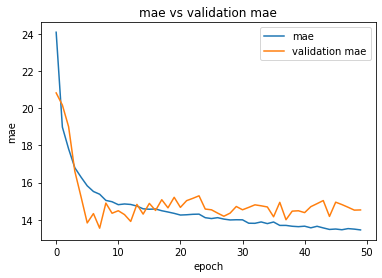

In [34]:
plt.plot(mae, label="mae")
plt.plot(val_mae,label="validation mae")
plt.title('mae vs validation mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

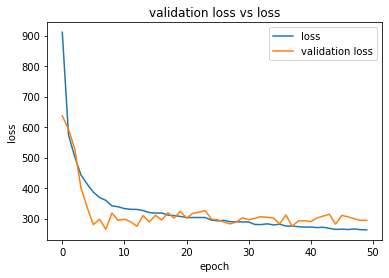

In [35]:
plt.plot(loss, label="loss")
plt.plot(val_loss,label="validation loss")
plt.title('validation loss vs loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show

### Black Box Interprétabilité

In [37]:
import shap
explainer = shap.KernelExplainer(model.predict,x_train)


Using 26882 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
dfnew=pd.concat([x_train,x_test])

In [42]:
shap_values = explainer.shap_values(pd.DataFrame(dfnew[dfnew.index==df["customerID"].iloc[30]].iloc[-1]).T,nsamples=100)

  0%|          | 0/1 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


In [41]:
pd.DataFrame(dfnew[dfnew.index==df["customerID"].iloc[30]].iloc[-1]).T

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,current_tenure
6207-WIOLX,0.0,-0.653749,1.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,-1.17432,25.0


In [44]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], pd.DataFrame(dfnew[dfnew.index==df["customerID"].iloc[30]].iloc[-1]).T)

We save all interpretations for all clients in html files in order to exploit them in our dashboard

In [ ]:
explainer = shap.KernelExplainer(model.predict,x_train)

def blackbox(explainer, row ,code):
    shap_values = explainer.shap_values(row,nsamples=100)
    shap.initjs()
    f=shap.force_plot(explainer.expected_value, shap_values[0], row)
    shap.save_html("./Templates/"+code+"deep.html", f)

dfnew=pd.concat([x_train,x_test])

for i in range(len(df)):
    blackbox(explainer,dfnew[dfnew.index==df["customerID"].iloc[i]].iloc[-1],df["customerID"].iloc[i])

The above plot shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red and those pushing the prediction lower are in blue. 

So, Charges, male gender, Parner and onlineBackup pushes the prediction higher and multipleLines, Contract and Current_tenure pushes the prediction lower.

The base value of tenure is 33.7

The output value is 30.70 for this client.

In [45]:
new_df=pd.DataFrame(dfnew[dfnew.index==df["customerID"].iloc[0]].iloc[-1]).T
for i in range(1,10):
    new_df=new_df.append(pd.DataFrame(dfnew[dfnew.index==df["customerID"].iloc[i]].iloc[-1]).T)
new_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,current_tenure
3668-QPYBK,1.0,-0.653749,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-1.387551,2.0
9237-HQITU,0.0,-0.653749,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-0.631141,2.0
9305-CDSKC,0.0,-0.653749,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,0.668449,8.0
7892-POOKP,0.0,-0.653749,1.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,0.899637,28.0
0280-XJGEX,1.0,-0.653749,0.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,0.850257,49.0
4190-MFLUW,0.0,-0.653749,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,-1.326948,10.0
8779-QRDMV,1.0,1.529638,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,-2.025001,1.0
1066-JKSGK,1.0,-0.653749,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,-2.900372,1.0
6467-CHFZW,1.0,-0.653749,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,0.654982,47.0
8665-UTDHZ,1.0,-0.642315,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-2.546340,1.0


In [46]:
shap_values = explainer.shap_values(new_df,nsamples=100)

  0%|          | 0/10 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [47]:
shap.force_plot(explainer.expected_value, shap_values[0], new_df)

In [149]:
features=x_test.columns

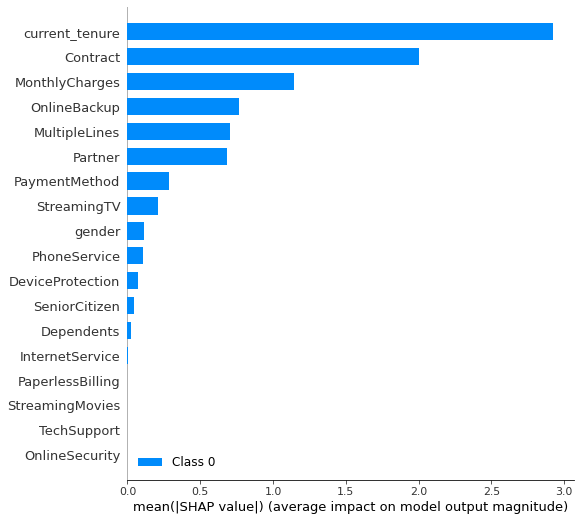

In [153]:
shap.summary_plot(shap_values,x_test,feature_names=features)

In [173]:
for i in range(len(x_test)):
    print("real: ", y_test[i]," Prediction: ", predict[i])

real:  1  Prediction:  [17.610687]
real:  13  Prediction:  [33.255623]
real:  13  Prediction:  [33.55907]
real:  13  Prediction:  [33.899857]
real:  13  Prediction:  [34.362675]
real:  13  Prediction:  [34.825485]
real:  13  Prediction:  [35.2883]
real:  13  Prediction:  [35.751114]
real:  13  Prediction:  [36.21393]
real:  13  Prediction:  [36.676743]
real:  13  Prediction:  [37.139553]
real:  13  Prediction:  [37.60237]
real:  13  Prediction:  [38.06518]
real:  13  Prediction:  [38.527992]
real:  2  Prediction:  [20.788647]
real:  2  Prediction:  [21.333675]
real:  1  Prediction:  [19.949259]
real:  49  Prediction:  [32.306984]
real:  49  Prediction:  [32.59069]
real:  49  Prediction:  [32.874397]
real:  49  Prediction:  [33.158104]
real:  49  Prediction:  [33.47041]
real:  49  Prediction:  [33.78632]
real:  49  Prediction:  [34.10223]
real:  49  Prediction:  [34.418137]
real:  49  Prediction:  [34.734047]
real:  49  Prediction:  [35.049953]
real:  49  Prediction:  [35.36586]
real:  

real:  22  Prediction:  [40.416763]
real:  22  Prediction:  [40.93946]
real:  22  Prediction:  [41.462147]
real:  22  Prediction:  [41.98483]
real:  22  Prediction:  [42.507523]
real:  22  Prediction:  [43.030212]
real:  22  Prediction:  [43.135513]
real:  22  Prediction:  [43.157402]
real:  16  Prediction:  [43.083]
real:  16  Prediction:  [43.318237]
real:  16  Prediction:  [43.553467]
real:  16  Prediction:  [43.788704]
real:  16  Prediction:  [44.023933]
real:  16  Prediction:  [44.25917]
real:  16  Prediction:  [44.4944]
real:  16  Prediction:  [44.72963]
real:  16  Prediction:  [44.964867]
real:  16  Prediction:  [45.200104]
real:  16  Prediction:  [45.435333]
real:  16  Prediction:  [45.67056]
real:  16  Prediction:  [45.905796]
real:  16  Prediction:  [46.115097]
real:  16  Prediction:  [46.477463]
real:  16  Prediction:  [46.839844]
real:  7  Prediction:  [33.42341]
real:  7  Prediction:  [33.616493]
real:  7  Prediction:  [33.819332]
real:  7  Prediction:  [34.02218]
real:  7

real:  29  Prediction:  [37.21939]
real:  29  Prediction:  [37.819016]
real:  29  Prediction:  [38.41863]
real:  29  Prediction:  [39.01825]
real:  29  Prediction:  [39.617867]
real:  28  Prediction:  [31.788715]
real:  28  Prediction:  [32.420418]
real:  28  Prediction:  [33.052124]
real:  28  Prediction:  [33.68382]
real:  28  Prediction:  [34.31552]
real:  28  Prediction:  [34.94722]
real:  28  Prediction:  [35.578926]
real:  28  Prediction:  [36.210625]
real:  28  Prediction:  [36.842323]
real:  28  Prediction:  [37.474022]
real:  28  Prediction:  [37.933617]
real:  28  Prediction:  [38.299522]
real:  28  Prediction:  [38.66543]
real:  28  Prediction:  [39.031338]
real:  28  Prediction:  [39.413742]
real:  28  Prediction:  [39.81185]
real:  28  Prediction:  [40.209953]
real:  28  Prediction:  [40.608067]
real:  28  Prediction:  [41.00618]
real:  28  Prediction:  [41.404285]
real:  28  Prediction:  [41.80239]
real:  28  Prediction:  [42.2005]
real:  28  Prediction:  [42.598614]
real

real:  58  Prediction:  [63.00459]
real:  58  Prediction:  [63.265984]
real:  58  Prediction:  [63.527386]
real:  58  Prediction:  [63.788773]
real:  58  Prediction:  [64.05017]
real:  58  Prediction:  [64.31156]
real:  58  Prediction:  [64.57296]
real:  58  Prediction:  [64.83436]
real:  58  Prediction:  [65.09575]
real:  58  Prediction:  [65.35715]
real:  58  Prediction:  [65.61854]
real:  58  Prediction:  [65.87993]
real:  58  Prediction:  [66.14133]
real:  58  Prediction:  [66.402725]
real:  58  Prediction:  [66.664116]
real:  58  Prediction:  [66.92551]
real:  58  Prediction:  [67.186905]
real:  58  Prediction:  [67.448296]
real:  58  Prediction:  [67.70969]
real:  58  Prediction:  [67.971085]
real:  14  Prediction:  [12.17168]
real:  14  Prediction:  [12.902676]
real:  14  Prediction:  [13.805144]
real:  14  Prediction:  [14.707609]
real:  14  Prediction:  [15.660986]
real:  14  Prediction:  [16.6153]
real:  14  Prediction:  [17.569605]
real:  14  Prediction:  [18.523918]
real:  

real:  53  Prediction:  [58.347736]
real:  53  Prediction:  [58.384254]
real:  53  Prediction:  [58.42077]
real:  53  Prediction:  [58.457287]
real:  53  Prediction:  [58.493805]
real:  53  Prediction:  [58.53032]
real:  53  Prediction:  [58.664555]
real:  53  Prediction:  [58.856773]
real:  53  Prediction:  [59.048985]
real:  53  Prediction:  [59.24119]
real:  53  Prediction:  [59.433407]
real:  53  Prediction:  [59.62562]
real:  53  Prediction:  [59.81784]
real:  53  Prediction:  [60.010048]
real:  53  Prediction:  [60.20225]
real:  53  Prediction:  [60.39447]
real:  53  Prediction:  [60.586678]
real:  52  Prediction:  [4.5061984]
real:  52  Prediction:  [5.974287]
real:  52  Prediction:  [7.442375]
real:  52  Prediction:  [8.910461]
real:  52  Prediction:  [10.378551]
real:  52  Prediction:  [11.84664]
real:  52  Prediction:  [13.314726]
real:  52  Prediction:  [14.782812]
real:  52  Prediction:  [16.2509]
real:  52  Prediction:  [17.718987]
real:  52  Prediction:  [18.774004]
real:

real:  68  Prediction:  [76.45728]
real:  68  Prediction:  [76.694496]
real:  57  Prediction:  [56.72547]
real:  57  Prediction:  [57.003155]
real:  57  Prediction:  [57.280834]
real:  57  Prediction:  [57.558517]
real:  57  Prediction:  [57.836197]
real:  57  Prediction:  [58.113876]
real:  57  Prediction:  [58.391563]
real:  57  Prediction:  [58.669243]
real:  57  Prediction:  [58.94693]
real:  57  Prediction:  [59.2246]
real:  57  Prediction:  [59.502285]
real:  57  Prediction:  [59.77997]
real:  57  Prediction:  [60.057648]
real:  57  Prediction:  [60.278206]
real:  57  Prediction:  [60.373905]
real:  57  Prediction:  [60.469597]
real:  57  Prediction:  [60.565292]
real:  57  Prediction:  [60.660988]
real:  57  Prediction:  [60.756683]
real:  57  Prediction:  [60.852383]
real:  57  Prediction:  [60.94808]
real:  57  Prediction:  [61.043774]
real:  57  Prediction:  [61.139465]
real:  57  Prediction:  [61.23743]
real:  57  Prediction:  [61.342274]
real:  57  Prediction:  [61.472473]


real:  6  Prediction:  [9.963224]
real:  6  Prediction:  [10.990437]
real:  6  Prediction:  [12.0021515]
real:  6  Prediction:  [12.981941]
real:  6  Prediction:  [13.961732]
real:  1  Prediction:  [5.803505]
real:  7  Prediction:  [14.360395]
real:  7  Prediction:  [15.118168]
real:  7  Prediction:  [15.875942]
real:  7  Prediction:  [16.633715]
real:  7  Prediction:  [17.391487]
real:  7  Prediction:  [18.149263]
real:  7  Prediction:  [18.907036]
real:  21  Prediction:  [20.70863]
real:  21  Prediction:  [21.424334]
real:  21  Prediction:  [22.14003]
real:  21  Prediction:  [22.855728]
real:  21  Prediction:  [23.57143]
real:  21  Prediction:  [24.287128]
real:  21  Prediction:  [25.00283]
real:  21  Prediction:  [25.71853]
real:  21  Prediction:  [26.58735]
real:  21  Prediction:  [27.559082]
real:  21  Prediction:  [28.530817]
real:  21  Prediction:  [29.340458]
real:  21  Prediction:  [30.069836]
real:  21  Prediction:  [30.799217]
real:  21  Prediction:  [31.528595]
real:  21  P

real:  35  Prediction:  [28.150913]
real:  35  Prediction:  [28.976082]
real:  35  Prediction:  [29.681133]
real:  35  Prediction:  [30.292538]
real:  35  Prediction:  [30.903938]
real:  35  Prediction:  [31.515343]
real:  35  Prediction:  [32.126747]
real:  35  Prediction:  [32.738148]
real:  35  Prediction:  [33.349556]
real:  35  Prediction:  [33.960953]
real:  35  Prediction:  [34.572357]
real:  35  Prediction:  [35.183765]
real:  35  Prediction:  [35.795166]
real:  35  Prediction:  [36.40657]
real:  35  Prediction:  [37.017975]
real:  35  Prediction:  [37.629375]
real:  35  Prediction:  [38.240784]
real:  35  Prediction:  [38.852184]
real:  35  Prediction:  [39.46359]
real:  35  Prediction:  [40.074997]
real:  35  Prediction:  [40.686394]
real:  6  Prediction:  [4.4313707]
real:  6  Prediction:  [5.3338366]
real:  6  Prediction:  [6.236304]
real:  6  Prediction:  [7.138768]
real:  6  Prediction:  [8.041233]
real:  6  Prediction:  [8.981861]
real:  38  Prediction:  [27.92899]
real:

real:  15  Prediction:  [24.861483]
real:  15  Prediction:  [25.521095]
real:  15  Prediction:  [26.180706]
real:  15  Prediction:  [26.840317]
real:  15  Prediction:  [27.54483]
real:  15  Prediction:  [28.370216]
real:  15  Prediction:  [29.195602]
real:  15  Prediction:  [30.020988]
real:  15  Prediction:  [30.846376]
real:  15  Prediction:  [31.671762]
real:  11  Prediction:  [14.970852]
real:  11  Prediction:  [16.147331]
real:  11  Prediction:  [17.323814]
real:  11  Prediction:  [18.5003]
real:  11  Prediction:  [19.67678]
real:  11  Prediction:  [20.853266]
real:  11  Prediction:  [22.029747]
real:  11  Prediction:  [23.20623]
real:  11  Prediction:  [24.382713]
real:  11  Prediction:  [25.559193]
real:  11  Prediction:  [26.735676]
real:  35  Prediction:  [26.162838]
real:  35  Prediction:  [26.823341]
real:  35  Prediction:  [27.48385]
real:  35  Prediction:  [28.144348]
real:  35  Prediction:  [28.80486]
real:  35  Prediction:  [29.46536]
real:  35  Prediction:  [30.12587]
r

real:  62  Prediction:  [70.30234]
real:  62  Prediction:  [70.53033]
real:  62  Prediction:  [70.75484]
real:  21  Prediction:  [20.561312]
real:  21  Prediction:  [20.906599]
real:  21  Prediction:  [21.251884]
real:  21  Prediction:  [21.597166]
real:  21  Prediction:  [21.94245]
real:  21  Prediction:  [22.287735]
real:  21  Prediction:  [22.633022]
real:  21  Prediction:  [22.978306]
real:  21  Prediction:  [23.323593]
real:  21  Prediction:  [23.67418]
real:  21  Prediction:  [24.078726]
real:  21  Prediction:  [24.483273]
real:  21  Prediction:  [24.88782]
real:  21  Prediction:  [25.292364]
real:  21  Prediction:  [25.844748]
real:  21  Prediction:  [26.582958]
real:  21  Prediction:  [27.32117]
real:  21  Prediction:  [28.05938]
real:  21  Prediction:  [28.799206]
real:  21  Prediction:  [29.541128]
real:  21  Prediction:  [30.283058]
real:  16  Prediction:  [21.077347]
real:  16  Prediction:  [21.749088]
real:  16  Prediction:  [22.46479]
real:  16  Prediction:  [23.18049]
re

real:  22  Prediction:  [44.243286]
real:  22  Prediction:  [44.56624]
real:  22  Prediction:  [44.88919]
real:  22  Prediction:  [45.212135]
real:  22  Prediction:  [45.535084]
real:  22  Prediction:  [45.85804]
real:  22  Prediction:  [46.180984]
real:  22  Prediction:  [46.503933]
real:  22  Prediction:  [46.826885]
real:  33  Prediction:  [21.105648]
real:  33  Prediction:  [21.594252]
real:  33  Prediction:  [22.082853]
real:  33  Prediction:  [22.571455]
real:  33  Prediction:  [23.060059]
real:  33  Prediction:  [23.548662]
real:  33  Prediction:  [24.037266]
real:  33  Prediction:  [24.625254]
real:  33  Prediction:  [25.236565]
real:  33  Prediction:  [25.84787]
real:  33  Prediction:  [26.459179]
real:  33  Prediction:  [27.070488]
real:  33  Prediction:  [27.681797]
real:  33  Prediction:  [28.293102]
real:  33  Prediction:  [28.904408]
real:  33  Prediction:  [29.51572]
real:  33  Prediction:  [30.127026]
real:  33  Prediction:  [30.73833]
real:  33  Prediction:  [31.349638

real:  26  Prediction:  [26.946213]
real:  26  Prediction:  [27.857533]
real:  26  Prediction:  [28.768845]
real:  26  Prediction:  [29.680164]
real:  26  Prediction:  [30.59148]
real:  26  Prediction:  [31.502796]
real:  26  Prediction:  [32.414116]
real:  26  Prediction:  [33.32543]
real:  26  Prediction:  [34.236748]
real:  26  Prediction:  [35.148067]
real:  26  Prediction:  [35.861763]
real:  52  Prediction:  [47.177307]
real:  52  Prediction:  [47.258255]
real:  52  Prediction:  [47.339203]
real:  52  Prediction:  [47.42016]
real:  52  Prediction:  [47.501106]
real:  52  Prediction:  [47.61099]
real:  52  Prediction:  [47.72414]
real:  52  Prediction:  [47.837296]
real:  52  Prediction:  [47.950455]
real:  52  Prediction:  [48.063614]
real:  52  Prediction:  [48.17677]
real:  52  Prediction:  [48.28992]
real:  52  Prediction:  [48.40308]
real:  52  Prediction:  [48.516235]
real:  52  Prediction:  [48.629395]
real:  52  Prediction:  [48.742546]
real:  52  Prediction:  [48.855705]


real:  15  Prediction:  [22.750088]
real:  15  Prediction:  [23.330824]
real:  15  Prediction:  [23.911564]
real:  15  Prediction:  [24.492298]
real:  15  Prediction:  [25.073036]
real:  15  Prediction:  [25.65377]
real:  15  Prediction:  [26.23451]
real:  15  Prediction:  [26.815247]
real:  15  Prediction:  [27.395987]
real:  15  Prediction:  [27.976723]
real:  16  Prediction:  [14.24954]
real:  16  Prediction:  [15.081884]
real:  16  Prediction:  [15.914228]
real:  16  Prediction:  [16.74657]
real:  16  Prediction:  [17.578913]
real:  16  Prediction:  [18.411257]
real:  16  Prediction:  [19.243603]
real:  16  Prediction:  [20.09215]
real:  16  Prediction:  [20.976337]
real:  16  Prediction:  [21.860523]
real:  16  Prediction:  [22.744713]
real:  16  Prediction:  [23.6289]
real:  16  Prediction:  [24.513088]
real:  16  Prediction:  [25.397274]
real:  16  Prediction:  [26.281464]
real:  16  Prediction:  [27.165651]
real:  6  Prediction:  [12.047329]
real:  6  Prediction:  [12.8696]
rea

real:  25  Prediction:  [36.058346]
real:  25  Prediction:  [36.75461]
real:  25  Prediction:  [37.450867]
real:  5  Prediction:  [21.616512]
real:  5  Prediction:  [22.277023]
real:  5  Prediction:  [22.937529]
real:  5  Prediction:  [23.598028]
real:  5  Prediction:  [24.25854]
real:  6  Prediction:  [20.834496]
real:  6  Prediction:  [21.064234]
real:  6  Prediction:  [21.619278]
real:  6  Prediction:  [22.352201]
real:  6  Prediction:  [23.085129]
real:  6  Prediction:  [23.818054]
real:  22  Prediction:  [26.471725]
real:  22  Prediction:  [27.103426]
real:  22  Prediction:  [27.735126]
real:  22  Prediction:  [28.357147]
real:  22  Prediction:  [28.723055]
real:  22  Prediction:  [29.08896]
real:  22  Prediction:  [29.454868]
real:  22  Prediction:  [29.820774]
real:  22  Prediction:  [30.186682]
real:  22  Prediction:  [30.55259]
real:  22  Prediction:  [30.918495]
real:  22  Prediction:  [31.314669]
real:  22  Prediction:  [31.712776]
real:  22  Prediction:  [32.110886]
real:  

real:  32  Prediction:  [38.632935]
real:  32  Prediction:  [39.192505]
real:  32  Prediction:  [39.752075]
real:  32  Prediction:  [40.311653]
real:  13  Prediction:  [11.668123]
real:  13  Prediction:  [12.543782]
real:  13  Prediction:  [13.489248]
real:  13  Prediction:  [14.574809]
real:  13  Prediction:  [15.660379]
real:  13  Prediction:  [16.745949]
real:  13  Prediction:  [17.831516]
real:  13  Prediction:  [18.917086]
real:  13  Prediction:  [20.002657]
real:  13  Prediction:  [21.08822]
real:  13  Prediction:  [22.173794]
real:  13  Prediction:  [23.259363]
real:  13  Prediction:  [24.344925]
real:  54  Prediction:  [51.128433]
real:  54  Prediction:  [51.632526]
real:  54  Prediction:  [52.136623]
real:  54  Prediction:  [52.640717]
real:  54  Prediction:  [53.144814]
real:  54  Prediction:  [53.64891]
real:  54  Prediction:  [54.15301]
real:  54  Prediction:  [54.657112]
real:  54  Prediction:  [55.161205]
real:  54  Prediction:  [55.6653]
real:  54  Prediction:  [55.97274

real:  53  Prediction:  [64.786026]
real:  53  Prediction:  [65.11223]
real:  53  Prediction:  [65.438416]
real:  53  Prediction:  [65.76461]
real:  53  Prediction:  [66.090805]
real:  53  Prediction:  [66.41699]
real:  53  Prediction:  [66.74319]
real:  53  Prediction:  [67.06938]
real:  53  Prediction:  [67.39557]
real:  30  Prediction:  [19.459333]
real:  30  Prediction:  [20.074175]
real:  30  Prediction:  [20.689018]
real:  30  Prediction:  [21.30386]
real:  30  Prediction:  [21.918703]
real:  30  Prediction:  [22.533543]
real:  30  Prediction:  [23.148382]
real:  30  Prediction:  [23.763231]
real:  30  Prediction:  [24.378063]
real:  30  Prediction:  [24.992912]
real:  30  Prediction:  [25.607754]
real:  30  Prediction:  [26.222597]
real:  30  Prediction:  [26.837437]
real:  30  Prediction:  [27.452282]
real:  30  Prediction:  [28.067123]
real:  30  Prediction:  [28.681961]
real:  30  Prediction:  [29.29681]
real:  30  Prediction:  [29.911648]
real:  30  Prediction:  [30.526493]


# Création Dataset avec Faker

In [4]:
from faker import Faker
fake=Faker()

In [378]:
data_charges=train[["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling"]]

In [379]:
target=train["MonthlyCharges"]

In [380]:
x_train, x_test, y_train, y_test = train_test_split(data_charges, target ,random_state=454, test_size=0.2)

In [381]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [382]:
regr = RandomForestRegressor(max_depth=42, random_state=454)
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=42, random_state=454)

In [384]:
pred=regr.predict(x_test)

In [385]:
from sklearn.metrics import r2_score

r2_score(pred,y_test)

0.9983598172820194

In [422]:
from sklearn import preprocessing
t = preprocessing.LabelEncoder()
x={}
t.fit(train["gender"])
x['gender']= np.random.choice(t.classes_)

In [445]:
def data(num=1, seed=42):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)
    t = preprocessing.LabelEncoder()
    
   
    output=[]
    for i in range(num):
        x={}
        t.fit(train["gender"])
        x["gender"]=np.random.choice(t.classes_)
        t.fit(train["SeniorCitizen"])
        x["SeniorCitizen"]=np.random.choice(t.classes_)
        t.fit(train["Partner"])
        x["Partner"]=np.random.choice(t.classes_)
        t.fit(train["Dependents"])
        x["Dependents"]=np.random.choice(t.classes_)

        x["tenure"]=np.random.choice(
                    np.arange(0, 72, 1)
                )          
        t.fit(train["PhoneService"])
        x["PhoneService"]=np.random.choice(t.classes_)
        t.fit(train["MultipleLines"])
        x["MultipleLines"]=np.random.choice(t.classes_)
        t.fit(train["InternetService"])
        x["InternetService"]=np.random.choice(t.classes_)
        t.fit(train["OnlineSecurity"])
        x["OnlineSecurity"]=np.random.choice(t.classes_)
        t.fit(train["OnlineBackup"])
        x["OnlineBackup"]=np.random.choice(t.classes_)
        t.fit(train["DeviceProtection"])
        x["DeviceProtection"]=np.random.choice(t.classes_)
        t.fit(train["TechSupport"])
        x["TechSupport"]=np.random.choice(t.classes_)
        t.fit(train["StreamingTV"])
        x["StreamingTV"]=np.random.choice(t.classes_)
        t.fit(train["StreamingMovies"])
        x["StreamingMovies"]=np.random.choice(t.classes_)
        t.fit(train["Contract"])
        x["Contract"]=np.random.choice(t.classes_)
        t.fit(train["PaperlessBilling"])
        x["PaperlessBilling"]=np.random.choice(t.classes_)
        t.fit(train["TechSupport"])
        x["TechSupport"]=np.random.choice(t.classes_)
        t.fit(train["PaymentMethod"])
        x["PaymentMethod"]=np.random.choice(t.classes_)
        output.append(x)

   
    return output

In [446]:
df = pd.DataFrame(data(num=10000, seed=0))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,1,0,67,1,1,1,2,0,2,2,0,0,2,1,3
1,1,0,0,1,37,1,1,0,1,0,0,0,2,0,2,1,1
2,1,1,1,1,14,1,0,1,1,1,0,0,0,2,2,1,2
3,0,0,0,1,5,0,0,0,1,0,1,1,2,0,1,1,1
4,1,0,1,1,46,0,0,2,1,0,1,0,0,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,42,0,0,1,0,2,0,1,0,0,1,1,2
9996,0,1,0,1,64,0,1,2,1,0,2,0,1,1,1,0,3
9997,1,1,0,1,56,0,2,1,1,2,0,0,1,0,0,1,2
9998,0,0,0,1,69,1,0,2,0,0,2,2,0,0,1,0,2


In [449]:
df['MonthlyCharges']=regr.predict(df[["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling"]])
df["TotalCharges"]=df["MonthlyCharges"]*df["tenure"]
df['Churn']=1

In [453]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,67,1,1,1,2,0,2,2,0,0,2,1,3,85.256567,5712.189967,1
1,1,0,0,1,37,1,1,0,1,0,0,0,2,0,2,1,1,56.189408,2079.008080,1
2,1,1,1,1,14,1,0,1,1,1,0,0,0,2,2,1,2,80.632600,1128.856399,1
3,0,0,0,1,5,0,0,0,1,0,1,1,2,0,1,1,1,36.479856,182.399279,1
4,1,0,1,1,46,0,0,2,1,0,1,0,0,0,2,0,3,19.973140,918.764445,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,42,0,0,1,0,2,0,1,0,0,1,1,2,74.798366,3141.531363,1
9996,0,1,0,1,64,0,1,2,1,0,2,0,1,1,1,0,3,19.890062,1272.963976,1
9997,1,1,0,1,56,0,2,1,1,2,0,0,1,0,0,1,2,80.221637,4492.411699,1
9998,0,0,0,1,69,1,0,2,0,0,2,2,0,0,1,0,2,19.890062,1372.414286,1
